# Customer segmentation

In [108]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv("data\HotelCustomersDataset.csv")

In [4]:
data.head(3)

ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  51.0                150   
1   2         PRT   NaN               1095   
2   3         DEU  31.0               1095   

                                            NameHash  \
0  0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1  0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2  0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   

                                           DocIDHash  AverageLeadTime  \
0  0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...               45   
1  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...               61   
2  0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...                0   

   LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
0           371.0         105.3                 1  ...              0   
1           280.0          53.0                 0  ...              0   
2             0.0           0.0                 0  ...              0   

   SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed SRNearElevator  \
0          0         0       0              0          0              0   
1          0         0       0              0          0              0   
2          0         0       0              0          0              0   

  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0                  0                     0            0  
1                  0                     0            0  
2                  0                     0            0  

[3 rows x 31 columns]

In [5]:
data.shape

(83590, 31)

In [6]:
features = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [7]:
data.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

### Checking missing values

In [8]:
data.isnull().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

### Identify duplicates

In [9]:
dups = data.duplicated()
data[dups]

Empty DataFrame
Columns: [ID, Nationality, Age, DaysSinceCreation, NameHash, DocIDHash, AverageLeadTime, LodgingRevenue, OtherRevenue, BookingsCanceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights, DaysSinceLastStay, DaysSinceFirstStay, DistributionChannel, MarketSegment, SRHighFloor, SRLowFloor, SRAccessibleRoom, SRMediumFloor, SRBathtub, SRShower, SRCrib, SRKingSizeBed, SRTwinBed, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar, SRQuietRoom]
Index: []

[0 rows x 31 columns]

### Columns info

In [10]:
data.select_dtypes(include='object')

Nationality                                           NameHash  \
0             PRT  0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1             PRT  0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2             DEU  0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3             FRA  0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4             FRA  0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...   
...           ...                                                ...   
83585         ITA  0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...   
83586         IRL  0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...   
83587         IRL  0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...   
83588         IRL  0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...   
83589         IRL  0x1F2AA8A78ABFCBF190BFFB7BF2D5489EDFECD95CA51F...   

                                               DocIDHash  \
0      0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...   
1      0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...   
2      0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...   
3      0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...   
4      0xE175754CF77247B202DD0820F49407C762C14A603B3A...   
...                                                  ...   
83585  0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...   
83586  0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...   
83587  0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...   
83588  0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...   
83589  0x0E0612BCF1C120B841DD02B9C27DF50B332815EDBB6D...   

         DistributionChannel          MarketSegment  
0                  Corporate              Corporate  
1      Travel Agent/Operator  Travel Agent/Operator  
2      Travel Agent/Operator  Travel Agent/Operator  
3      Travel Agent/Operator  Travel Agent/Operator  
4      Travel Agent/Operator  Travel Agent/Operator  
...                      ...                    ...  
83585  Travel Agent/Operator                  Other  
83586  Travel Agent/Operator                  Other  
83587  Travel Agent/Operator                  Other  
83588  Travel Agent/Operator                  Other  
83589  Travel Agent/Operator                  Other  

[83590 rows x 5 columns]

In [11]:
data['Nationality'].value_counts()

FRA    12422
PRT    11597
DEU    10232
GBR     8656
ESP     4902
       ...  
GIN        1
KNA        1
GNQ        1
JEY        1
NPL        1
Name: Nationality, Length: 188, dtype: int64

In [12]:
data['DistributionChannel'].value_counts()

Travel Agent/Operator      68569
Direct                     11912
Corporate                   2600
Electronic Distribution      509
Name: DistributionChannel, dtype: int64

In [13]:
data['MarketSegment'].value_counts()

Other                    48039
Travel Agent/Operator    11670
Direct                   11457
Groups                    9501
Corporate                 2169
Complementary              510
Aviation                   244
Name: MarketSegment, dtype: int64

#### Float columns

In [14]:
data.select_dtypes(include="float")

Age  LodgingRevenue  OtherRevenue
0      51.0           371.0         105.3
1       NaN           280.0          53.0
2      31.0             0.0           0.0
3      60.0           240.0          60.0
4      51.0             0.0           0.0
...     ...             ...           ...
83585  54.0             0.0           0.0
83586  47.0           327.1         277.5
83587  53.0             0.0           0.0
83588  85.0           981.3           9.0
83589  13.0             0.0           0.0

[83590 rows x 3 columns]

#### Integer columns

In [15]:
data.select_dtypes(include="int")

ID  DaysSinceCreation  AverageLeadTime  BookingsCanceled  \
0          1                150               45                 1   
1          2               1095               61                 0   
2          3               1095                0                 0   
3          4               1095               93                 0   
4          5               1095                0                 0   
...      ...                ...              ...               ...   
83585  83586                  0                0                 0   
83586  83587                  0              109                 0   
83587  83588                  0                0                 0   
83588  83589                  0              109                 0   
83589  83590                  0                0                 0   

       BookingsNoShowed  BookingsCheckedIn  PersonsNights  RoomNights  \
0                     0                  3              8           5   
1                     0                  1             10           5   
2                     0                  0              0           0   
3                     0                  1             10           5   
4                     0                  0              0           0   
...                 ...                ...            ...         ...   
83585                 0                  0              0           0   
83586                 0                  1              6           3   
83587                 0                  0              0           0   
83588                 0                  1              6           3   
83589                 0                  0              0           0   

       DaysSinceLastStay  DaysSinceFirstStay  ...  SRMediumFloor  SRBathtub  \
0                    151                1074  ...              0          0   
1                   1100                1100  ...              0          0   
2                     -1                  -1  ...              0          0   
3                   1100                1100  ...              0          0   
4                     -1                  -1  ...              0          0   
...                  ...                 ...  ...            ...        ...   
83585                 -1                  -1  ...              0          0   
83586                  3                   3  ...              0          0   
83587                 -1                  -1  ...              0          0   
83588                  3                   3  ...              0          0   
83589                 -1                  -1  ...              0          0   

       SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
0             0       0              0          0               0   
1             0       0              0          0               0   
2             0       0              0          0               0   
3             0       0              0          0               0   
4             0       0              0          0               0   
...         ...     ...            ...        ...             ...   
83585         0       0              0          0               0   
83586         0       0              1          0               0   
83587         0       0              1          0               0   
83588         0       0              0          1               0   
83589         0       0              0          1               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0                       0                     0            0  
1                       0                     0            0  
2                       0                     0            0  
3                       0                     0            0  
4                       0                     0            0  
...                   ...                   ...          ...  
83585                   0                     0            0  
83586     

### Encoding categorical features

In [16]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Nationality',
 'NameHash',
 'DocIDHash',
 'DistributionChannel',
 'MarketSegment']

In [17]:
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  int32  
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  int32  
 5   DocIDHash             83590 non-null  int32  
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

### Handling missing values

#### with most frequent value

In [18]:
data_with_most_frequent = data.copy()
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_with_most_frequent['Age'] = imp_most_frequent.fit_transform(data['Age'].values.reshape(-1,1))[:,0]
data_with_most_frequent.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

#### with KNN method

In [19]:
data_with_knn = data.copy()
imp_knn = KNNImputer(n_neighbors=2)
data_with_knn['Age'] = imp_knn.fit_transform(data['Age'].values.reshape(-1,1))[:,0]
data_with_knn.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

### Descriptive statistics

In [20]:
data.describe()

ID   Nationality           Age  DaysSinceCreation  \
count  83590.000000  83590.000000  79811.000000       83590.000000   
mean   41795.500000     75.550114     45.398028         453.640902   
std    24130.498838     45.869324     16.572368         313.390291   
min        1.000000      0.000000    -11.000000           0.000000   
25%    20898.250000     43.000000     34.000000         177.000000   
50%    41795.500000     57.000000     46.000000         397.000000   
75%    62692.750000    123.000000     57.000000         723.000000   
max    83590.000000    187.000000    122.000000        1095.000000   

           NameHash     DocIDHash  AverageLeadTime  LodgingRevenue  \
count  83590.000000  83590.000000     83590.000000    83590.000000   
mean   40324.441213  38045.935973        66.196028      298.802087   
std    23285.983630  21830.938883        87.758990      372.851892   
min        0.000000      0.000000        -1.000000        0.000000   
25%    20152.250000  20103.000000         0.000000       59.000000   
50%    40359.500000  36691.500000        29.000000      234.000000   
75%    60491.750000  56845.750000       103.000000      402.000000   
max    80641.000000  76992.000000       588.000000    21781.000000   

       OtherRevenue  BookingsCanceled  ...  SRMediumFloor     SRBathtub  \
count  83590.000000      83590.000000  ...   83590.000000  83590.000000   
mean      67.589132          0.002022  ...       0.000873      0.002847   
std      114.327776          0.066770  ...       0.029539      0.053284   
min        0.000000          0.000000  ...       0.000000      0.000000   
25%        2.000000          0.000000  ...       0.000000      0.000000   
50%       38.500000          0.000000  ...       0.000000      0.000000   
75%       87.675000          0.000000  ...       0.000000      0.000000   
max     7730.250000          9.000000  ...       1.000000      1.000000   

           SRShower        SRCrib  SRKingSizeBed     SRTwinBed  \
count  83590.000000  83590.000000   83590.000000  83590.000000   
mean       0.001711      0.013219       0.352686      0.142541   
std        0.041326      0.114213       0.477809      0.349606   
min        0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000   
75%        0.000000      0.000000       1.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000   

       SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar   SRQuietRoom  
count    83590.000000        83590.000000          83590.000000  83590.000000  
mean         0.000335            0.003505              0.000120      0.088372  
std          0.018299            0.059101              0.010937      0.283837  
min          0.000000            0.000000              0.000000      0.000000  
25%          0.000000            0.000000              0.000000      0.000000  
50%          0.000000            0.000000              0.000000      0.000000  
75%          0.000000            0.000000              0.000000      0.000000  
max          1.000000            1.000000              1.000000      1.000000  

[8 rows x 31 columns]

In [21]:
data_with_most_frequent.describe()

ID   Nationality           Age  DaysSinceCreation  \
count  83590.000000  83590.000000  83590.000000       83590.000000   
mean   41795.500000     75.550114     45.606077         453.640902   
std    24130.498838     45.869324     16.221625         313.390291   
min        1.000000      0.000000    -11.000000           0.000000   
25%    20898.250000     43.000000     34.000000         177.000000   
50%    41795.500000     57.000000     47.000000         397.000000   
75%    62692.750000    123.000000     56.000000         723.000000   
max    83590.000000    187.000000    122.000000        1095.000000   

           NameHash     DocIDHash  AverageLeadTime  LodgingRevenue  \
count  83590.000000  83590.000000     83590.000000    83590.000000   
mean   40324.441213  38045.935973        66.196028      298.802087   
std    23285.983630  21830.938883        87.758990      372.851892   
min        0.000000      0.000000        -1.000000        0.000000   
25%    20152.250000  20103.000000         0.000000       59.000000   
50%    40359.500000  36691.500000        29.000000      234.000000   
75%    60491.750000  56845.750000       103.000000      402.000000   
max    80641.000000  76992.000000       588.000000    21781.000000   

       OtherRevenue  BookingsCanceled  ...  SRMediumFloor     SRBathtub  \
count  83590.000000      83590.000000  ...   83590.000000  83590.000000   
mean      67.589132          0.002022  ...       0.000873      0.002847   
std      114.327776          0.066770  ...       0.029539      0.053284   
min        0.000000          0.000000  ...       0.000000      0.000000   
25%        2.000000          0.000000  ...       0.000000      0.000000   
50%       38.500000          0.000000  ...       0.000000      0.000000   
75%       87.675000          0.000000  ...       0.000000      0.000000   
max     7730.250000          9.000000  ...       1.000000      1.000000   

           SRShower        SRCrib  SRKingSizeBed     SRTwinBed  \
count  83590.000000  83590.000000   83590.000000  83590.000000   
mean       0.001711      0.013219       0.352686      0.142541   
std        0.041326      0.114213       0.477809      0.349606   
min        0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000   
75%        0.000000      0.000000       1.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000   

       SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar   SRQuietRoom  
count    83590.000000        83590.000000          83590.000000  83590.000000  
mean         0.000335            0.003505              0.000120      0.088372  
std          0.018299            0.059101              0.010937      0.283837  
min          0.000000            0.000000              0.000000      0.000000  
25%          0.000000            0.000000              0.000000      0.000000  
50%          0.000000            0.000000              0.000000      0.000000  
75%          0.000000            0.000000              0.000000      0.000000  
max          1.000000            1.000000              1.000000      1.000000  

[8 rows x 31 columns]

In [22]:
data_with_knn.describe()

ID   Nationality           Age  DaysSinceCreation  \
count  83590.000000  83590.000000  83590.000000       83590.000000   
mean   41795.500000     75.550114     45.398028         453.640902   
std    24130.498838     45.869324     16.193423         313.390291   
min        1.000000      0.000000    -11.000000           0.000000   
25%    20898.250000     43.000000     34.000000         177.000000   
50%    41795.500000     57.000000     45.398028         397.000000   
75%    62692.750000    123.000000     56.000000         723.000000   
max    83590.000000    187.000000    122.000000        1095.000000   

           NameHash     DocIDHash  AverageLeadTime  LodgingRevenue  \
count  83590.000000  83590.000000     83590.000000    83590.000000   
mean   40324.441213  38045.935973        66.196028      298.802087   
std    23285.983630  21830.938883        87.758990      372.851892   
min        0.000000      0.000000        -1.000000        0.000000   
25%    20152.250000  20103.000000         0.000000       59.000000   
50%    40359.500000  36691.500000        29.000000      234.000000   
75%    60491.750000  56845.750000       103.000000      402.000000   
max    80641.000000  76992.000000       588.000000    21781.000000   

       OtherRevenue  BookingsCanceled  ...  SRMediumFloor     SRBathtub  \
count  83590.000000      83590.000000  ...   83590.000000  83590.000000   
mean      67.589132          0.002022  ...       0.000873      0.002847   
std      114.327776          0.066770  ...       0.029539      0.053284   
min        0.000000          0.000000  ...       0.000000      0.000000   
25%        2.000000          0.000000  ...       0.000000      0.000000   
50%       38.500000          0.000000  ...       0.000000      0.000000   
75%       87.675000          0.000000  ...       0.000000      0.000000   
max     7730.250000          9.000000  ...       1.000000      1.000000   

           SRShower        SRCrib  SRKingSizeBed     SRTwinBed  \
count  83590.000000  83590.000000   83590.000000  83590.000000   
mean       0.001711      0.013219       0.352686      0.142541   
std        0.041326      0.114213       0.477809      0.349606   
min        0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000   
75%        0.000000      0.000000       1.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000   

       SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar   SRQuietRoom  
count    83590.000000        83590.000000          83590.000000  83590.000000  
mean         0.000335            0.003505              0.000120      0.088372  
std          0.018299            0.059101              0.010937      0.283837  
min          0.000000            0.000000              0.000000      0.000000  
25%          0.000000            0.000000              0.000000      0.000000  
50%          0.000000            0.000000              0.000000      0.000000  
75%          0.000000            0.000000              0.000000      0.000000  
max          1.000000            1.000000              1.000000      1.000000  

[8 rows x 31 columns]

#### Droping unimportant columns

In [23]:
data_wo_idhash = data.copy()
data_with_most_frequent_wo_idhash = data_with_most_frequent.copy()
data_with_knn_wo_idhash = data_with_knn.copy()

data_wo_idhash = data_wo_idhash.drop(columns=['ID', 'NameHash', 'DocIDHash'])
data_with_most_frequent_wo_idhash = data_with_most_frequent_wo_idhash.drop(columns=['ID', 'NameHash', 'DocIDHash'])
data_with_knn_wo_idhash = data_with_knn_wo_idhash.drop(columns=['ID', 'NameHash', 'DocIDHash'])

### Correlation between features

<AxesSubplot: >

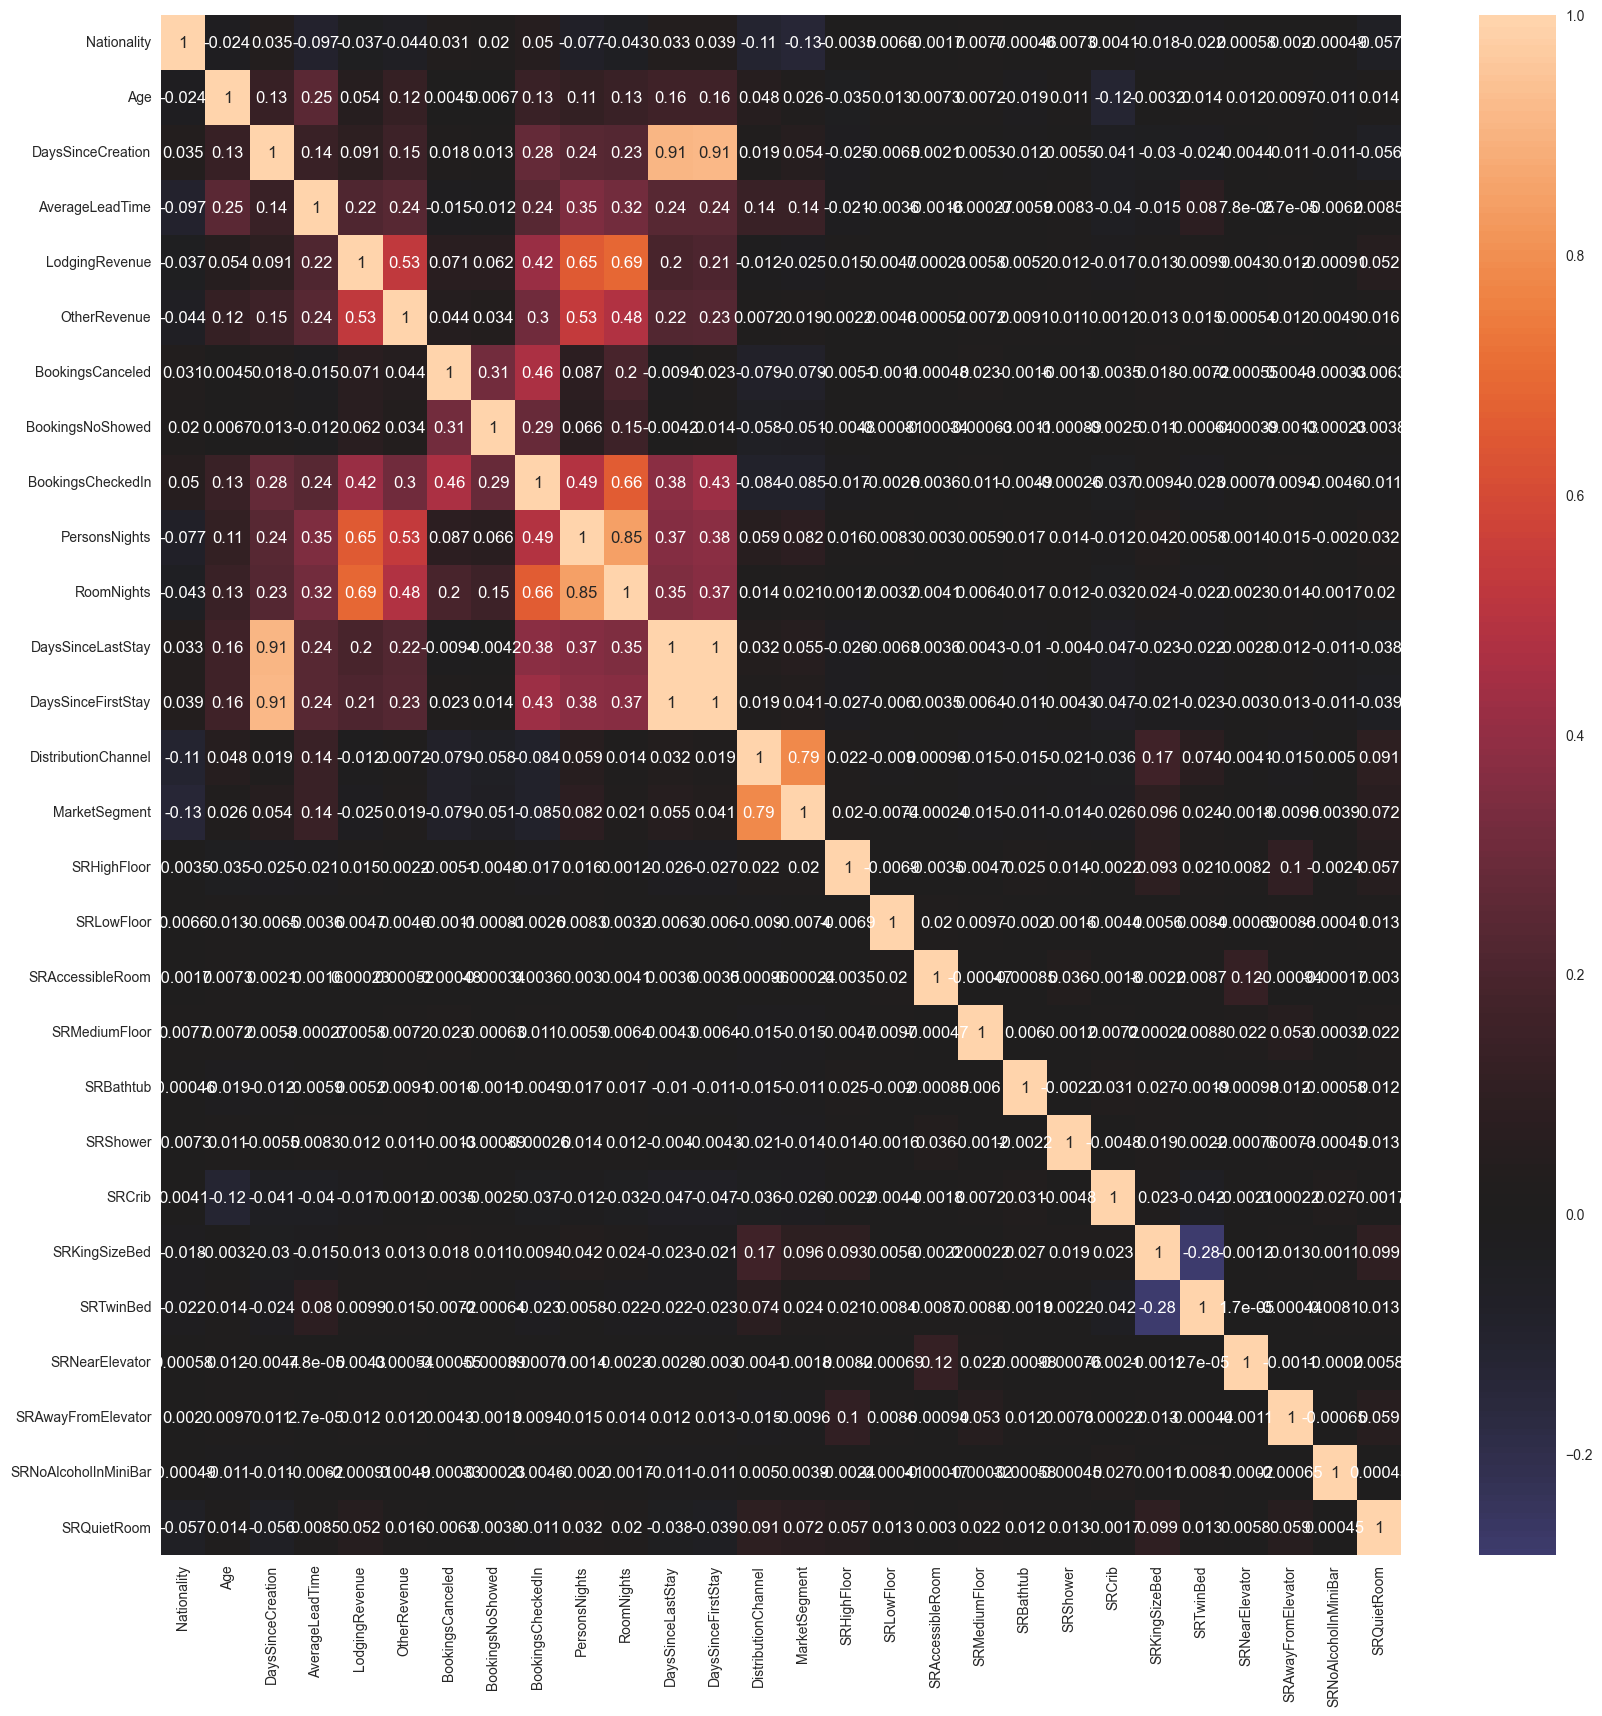

In [24]:
plt.figure(figsize=(20,20))  
sns.heatmap(data_wo_idhash.corr(), annot=True, center=0)

### Dimensionality reduction

In [25]:
pca = PCA(n_components=3)
pca.fit(data_with_knn)
reduced_data = pd.DataFrame(pca.transform(data_with_knn), columns=(["c1","c2", "c3"]))

pca = PCA(n_components=3)
pca.fit(data_with_knn_wo_idhash)
reduced_data_wo_idhash = pd.DataFrame(pca.transform(data_with_knn_wo_idhash), columns=(["c1","c2", "c3"]))

### Determinating number of clusters

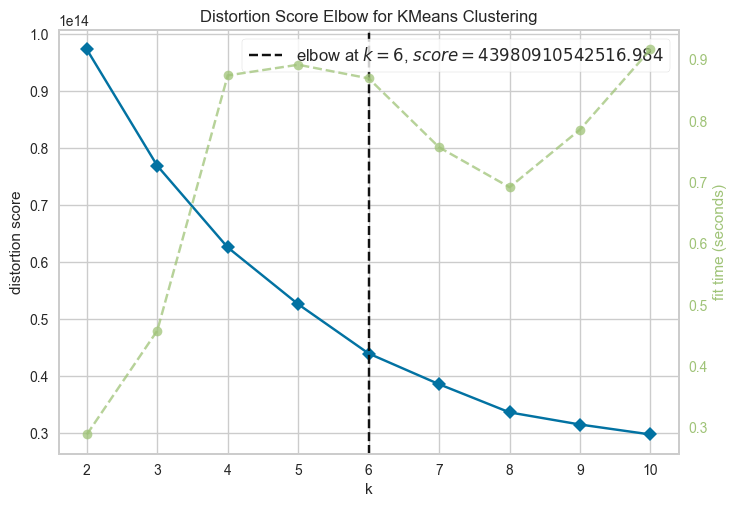

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_with_knn)
Elbow_M.show()

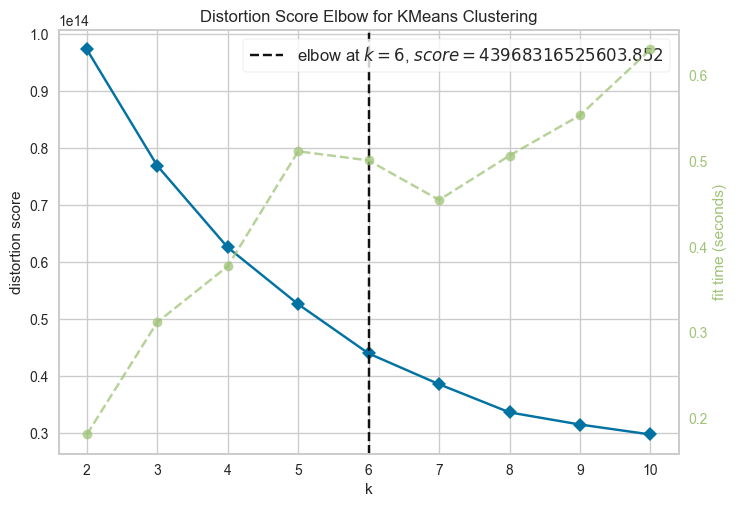

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_data)
Elbow_M.show()

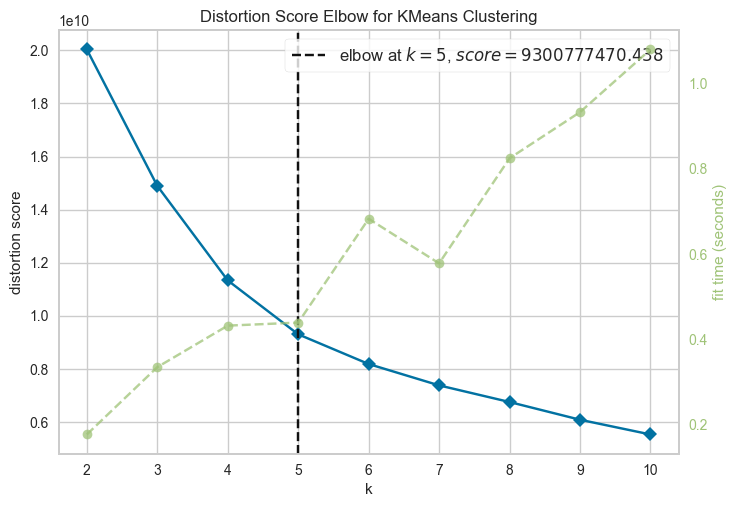

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_with_knn_wo_idhash)
Elbow_M.show()

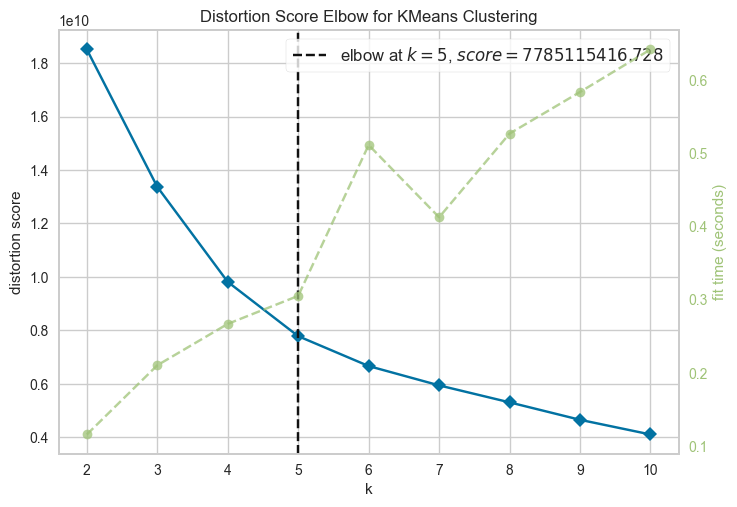

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_data_wo_idhash)
Elbow_M.show()

### Clustering Models

#### KMeans

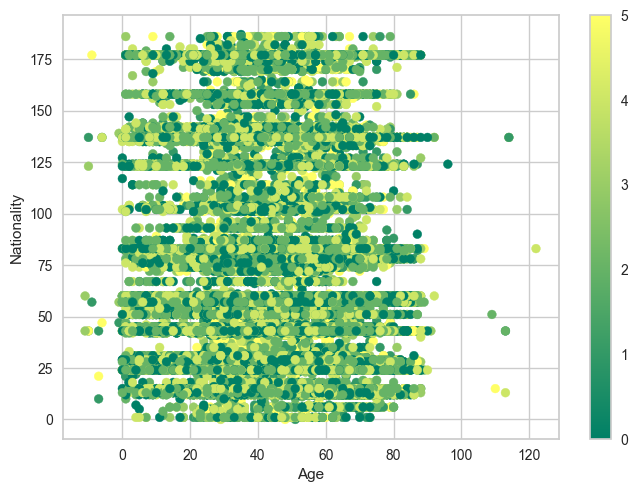

In [30]:
features = data_with_knn.copy()
kmeans_model = KMeans(n_clusters=6)
clust_labels = kmeans_model.fit_predict(data_with_knn)
features['Clusters'] = clust_labels

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
ax.set_xlabel('Age')
ax.set_ylabel('Nationality')
plt.colorbar(scatter)

In [31]:
silhouette_score(features, kmeans_model.labels_)

0.2837834556307926

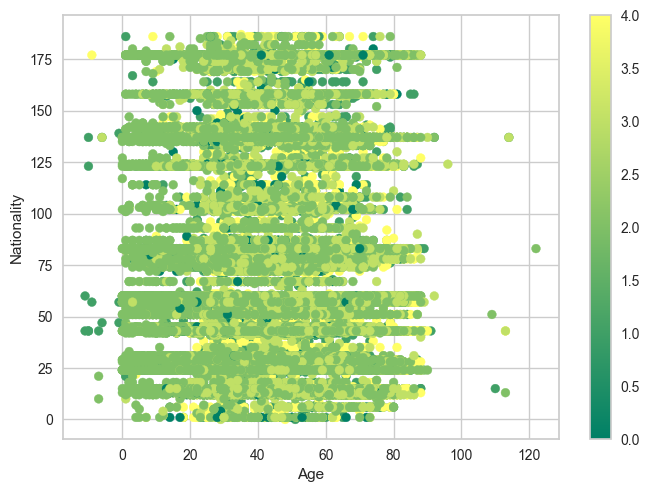

In [32]:
features = data_with_knn_wo_idhash.copy()
kmeans_model = KMeans(n_clusters=5)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
ax.set_xlabel('Age')
ax.set_ylabel('Nationality')
plt.colorbar(scatter)

In [33]:
silhouette_score(features, kmeans_model.labels_)

0.41541391094690355

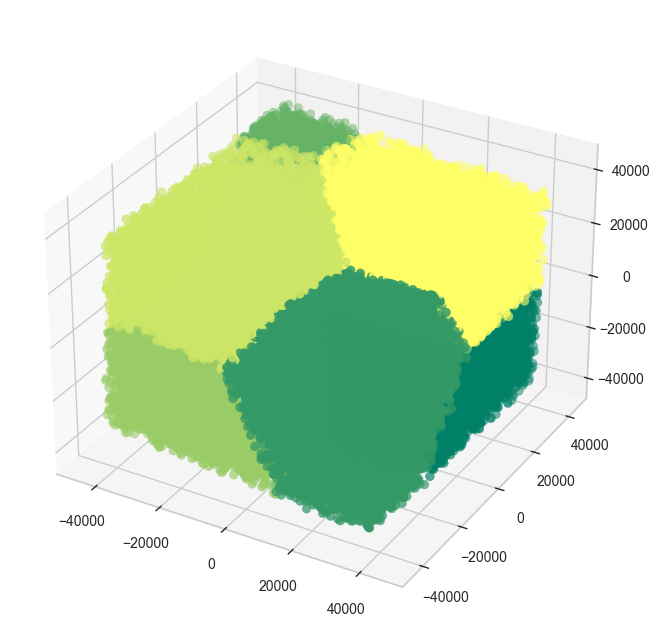

In [34]:
features = reduced_data.copy()
kmeans_model = KMeans(n_clusters=6)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(features['c1'], features['c2'], features['c3'], s=40, c=features["Clusters"], marker='o', cmap='summer')
plt.show()

In [35]:
silhouette_score(features, kmeans_model.labels_)

0.28387065594887906

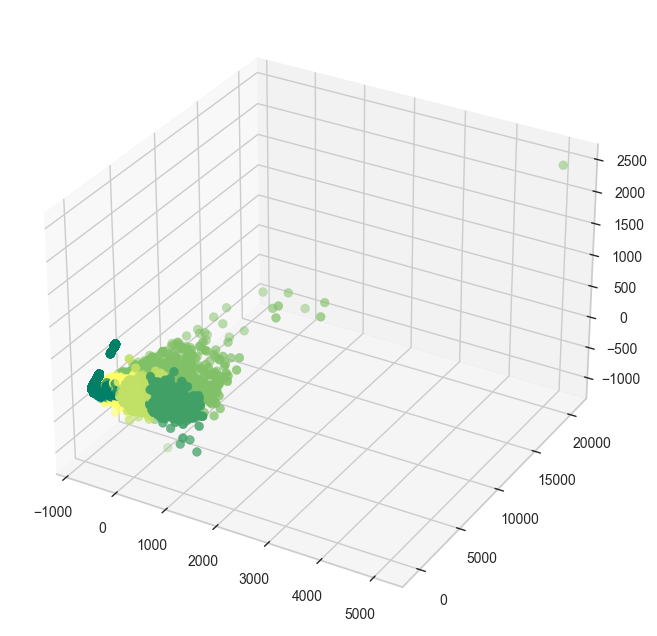

In [36]:
features = reduced_data_wo_idhash.copy()
kmeans_model = KMeans(n_clusters=5)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(features['c1'], features['c2'], features['c3'], s=40, c=features["Clusters"], marker='o', cmap='summer')
plt.show()

In [37]:
silhouette_score(features, kmeans_model.labels_)

0.46138013390383864

### Outliers

#### Age

In [93]:
data_with_knn_wo_idhash = data_with_knn_wo_idhash[(data_with_knn_wo_idhash["Age"]<=90)]
data_with_knn_wo_idhash = data_with_knn_wo_idhash[(data_with_knn_wo_idhash["Age"]>=0)]
data_with_knn_wo_idhash = data_with_knn_wo_idhash[data_with_knn_wo_idhash['AverageLeadTime'] >= 0] 

df = data_with_knn_wo_idhash
df.shape

(83550, 28)

#### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x2a5e31c72b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a5e31c77f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a5e31c7070>,
 'medians': [<matplotlib.lines.Line2D at 0x2a5e31c7d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a5e31c7fd0>,
 'means': []}

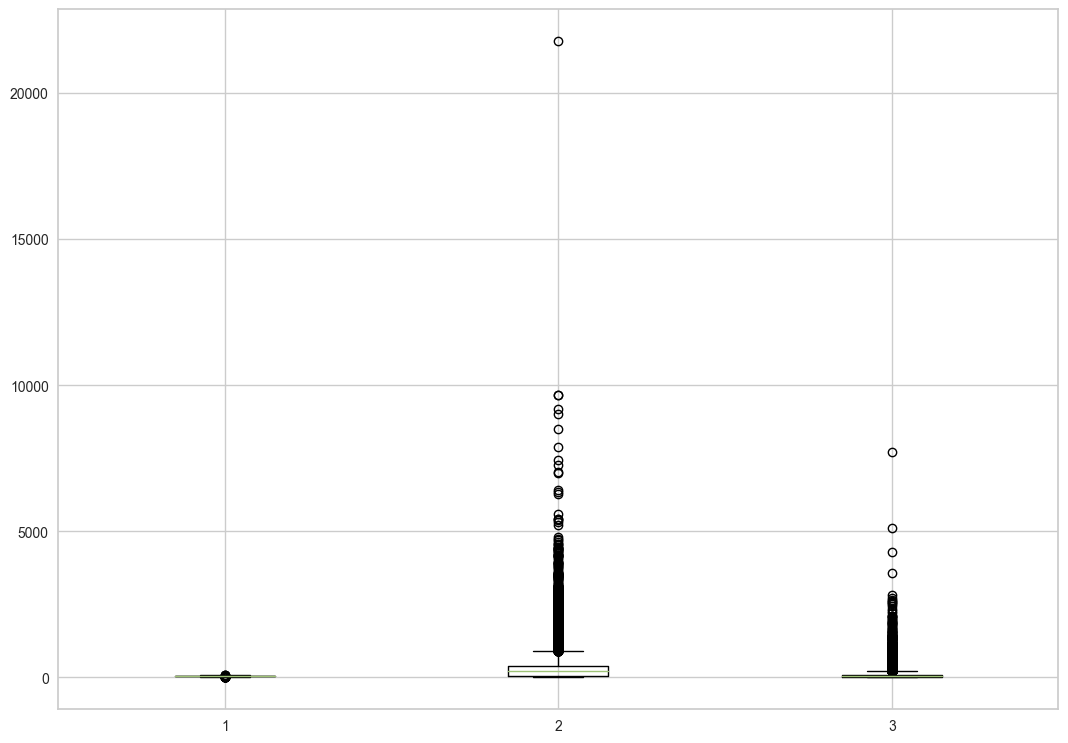

In [39]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(df.select_dtypes(include="float"))

{'whiskers': [<matplotlib.lines.Line2D at 0x2a5daf449d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a5daf44f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a5daf44760>,
 'medians': [<matplotlib.lines.Line2D at 0x2a5daf45450>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a5daf456f0>,
 'means': []}

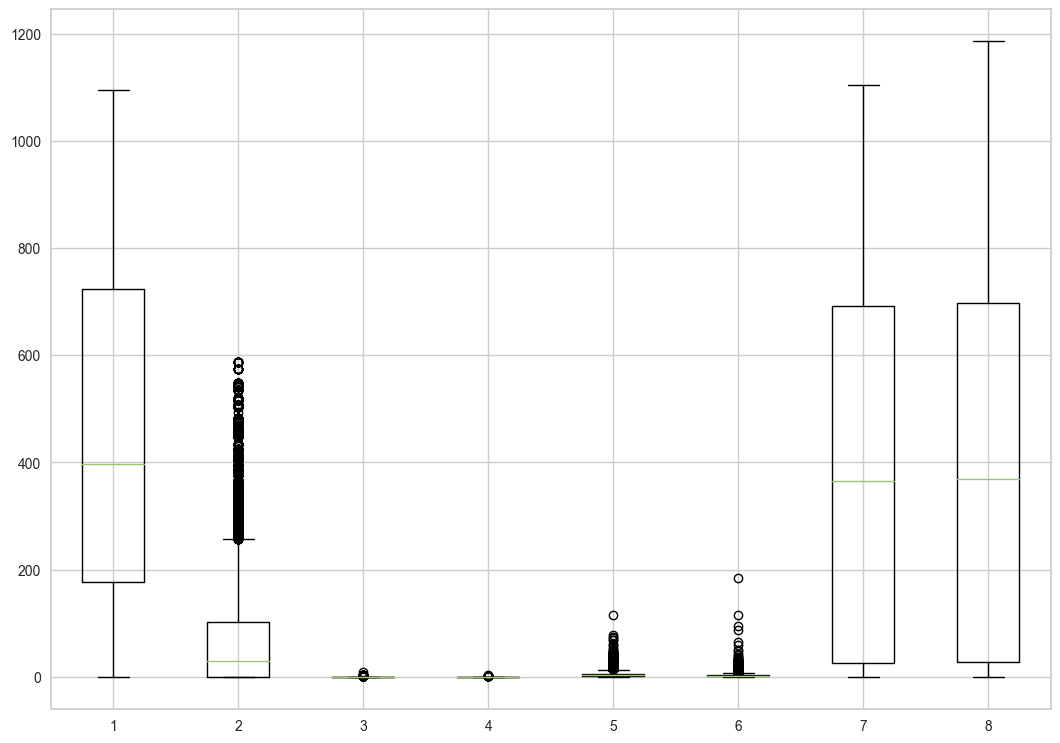

In [40]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot([df['DaysSinceCreation'], df['AverageLeadTime'], df['BookingsCanceled'], df['BookingsNoShowed'], df['PersonsNights'], df['RoomNights'], df['DaysSinceLastStay'], df['DaysSinceFirstStay']])

In [41]:
df.select_dtypes(include="float").skew()

Age               -0.166335
LodgingRevenue     6.576975
OtherRevenue      10.822453
dtype: float64

In [42]:
df[['AverageLeadTime', 'PersonsNights', 'RoomNights']].skew()

AverageLeadTime     1.910807
PersonsNights       1.928908
RoomNights         11.190691
dtype: float64

#### IQR

In [50]:
def outliers_detection(feature):
    percentiles = np.percentile(feature, [25,75])

    iqr = stats.iqr(feature)
    lower_limit = percentiles[0] - 1.5 * iqr
    upper_limit = percentiles[1] + 1.5 * iqr
    filtered = df[(feature <= lower_limit) & (feature >= upper_limit)] 
    return filtered.size

In [51]:
outliers_detection(df['AverageLeadTime'])

0

In [53]:
outliers_detection(df['OtherRevenue'])

0

In [54]:
outliers_detection(df['AverageLeadTime'])

0

In [55]:
outliers_detection(df['PersonsNights'])

0

In [56]:
outliers_detection(df['RoomNights'])

0

### Testing Models

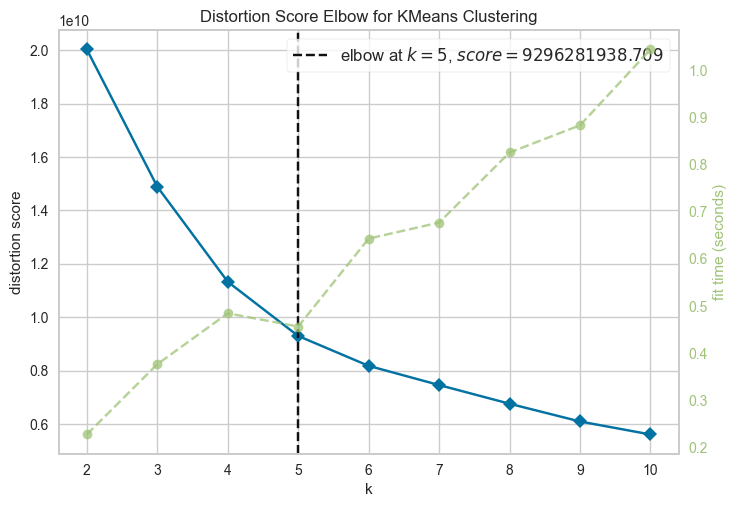

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

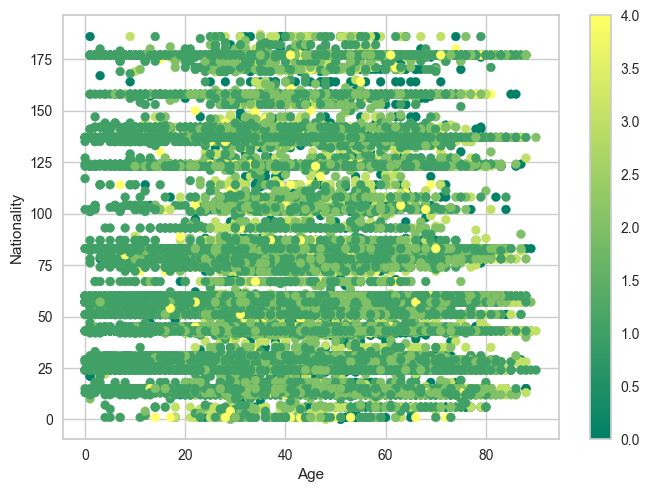

In [74]:
features = df.copy()
kmeans_model = KMeans(n_clusters=5)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
ax.set_xlabel('Age')
ax.set_ylabel('Nationality')
plt.colorbar(scatter)

In [75]:
silhouette_score(features, kmeans_model.labels_)

0.41551141925718355

In [62]:
pca = PCA(n_components=3)
pca.fit(df)
reduced_data = pd.DataFrame(pca.transform(df), columns=(["c1","c2", "c3"]))

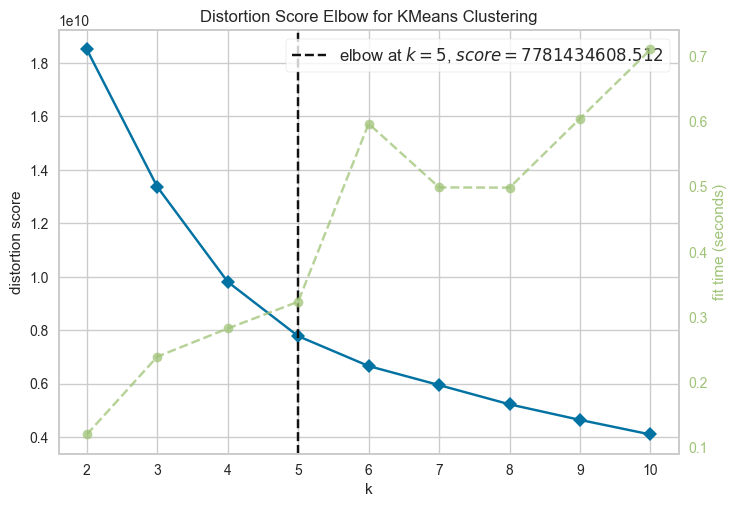

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_data)
Elbow_M.show()

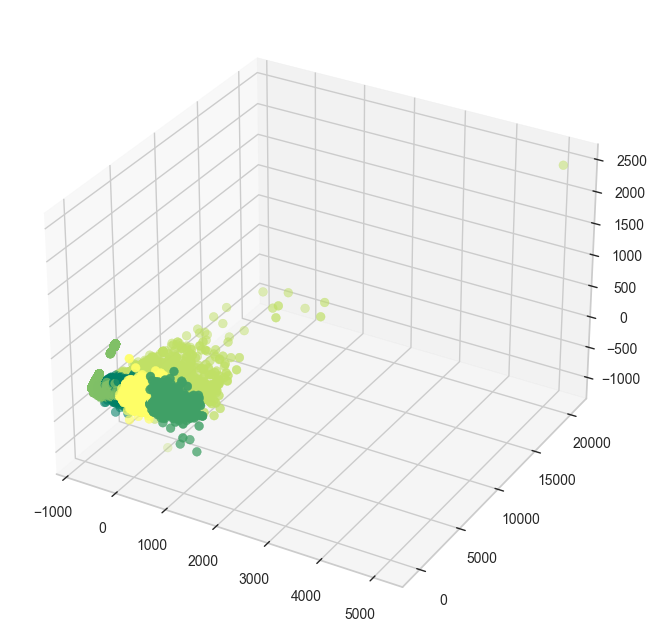

In [78]:
features = reduced_data.copy()
kmeans_model = KMeans(n_clusters=5)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(features['c1'], features['c2'], features['c3'], s=40, c=features["Clusters"], marker='o', cmap='summer')
plt.show()

In [65]:
silhouette_score(features, kmeans_model.labels_)

0.461509113772513

#### Scalers

In [79]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

df_standard = standard.fit_transform(df)
df_minmax = minmax.fit_transform(df)
df_robust = robust.fit_transform(df)

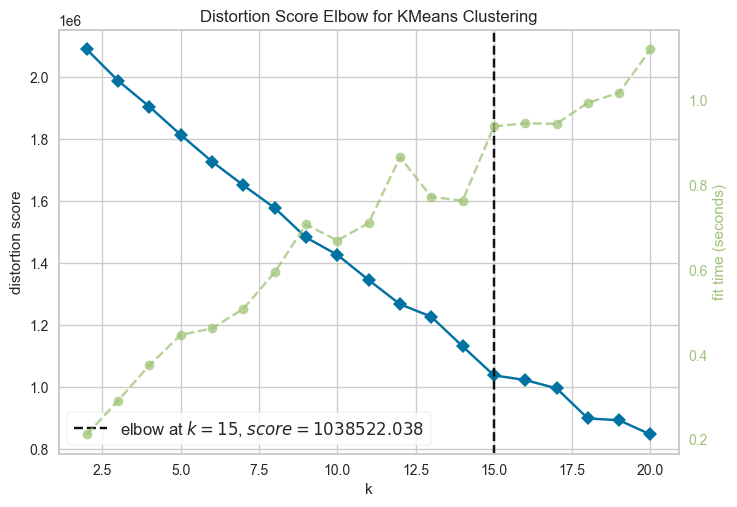

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(df_standard)
Elbow_M.show()

In [90]:
features = df_standard.copy()
kmeans_model = KMeans(n_clusters=15)
clust_labels = kmeans_model.fit_predict(features)
# features['Clusters'] = clust_labels

# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
# ax.set_xlabel('Age')
# ax.set_ylabel('Nationality')
# plt.colorbar(scatter)

silhouette_score(features, kmeans_model.labels_)

0.14821379759941603

In [84]:
pca = PCA(n_components=3)
pca.fit(df_standard)
reduced_df_standard = pd.DataFrame(pca.transform(df_standard), columns=(["c1","c2", "c3"]))

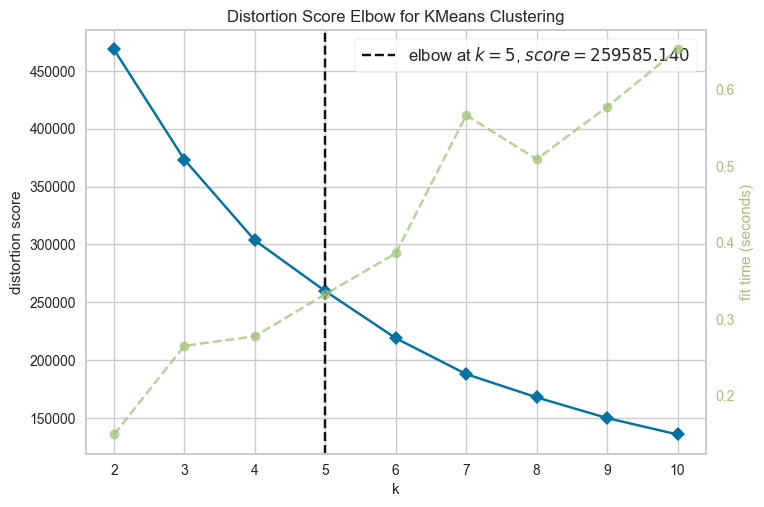

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_df_standard)
Elbow_M.show()

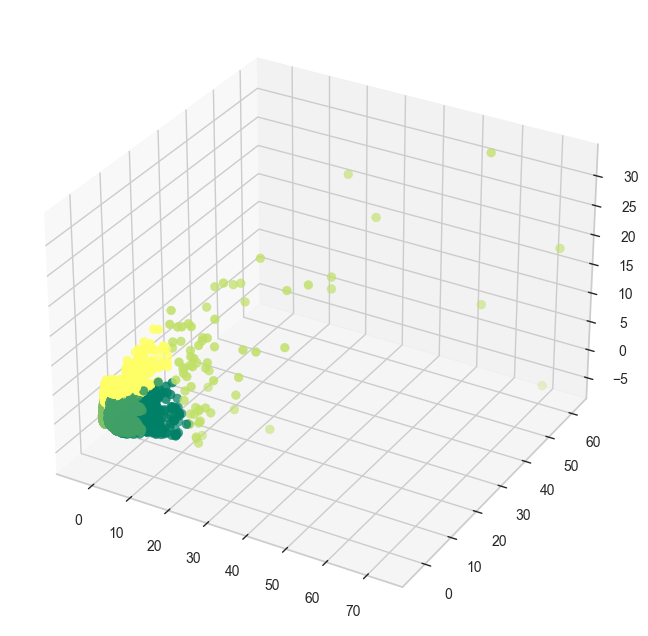

In [85]:
features = reduced_df_standard.copy()
kmeans_model = KMeans(n_clusters=5)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(features['c1'], features['c2'], features['c3'], s=40, c=features["Clusters"], marker='o', cmap='summer')
plt.show()

In [86]:
silhouette_score(features, kmeans_model.labels_)

0.4566721780011967

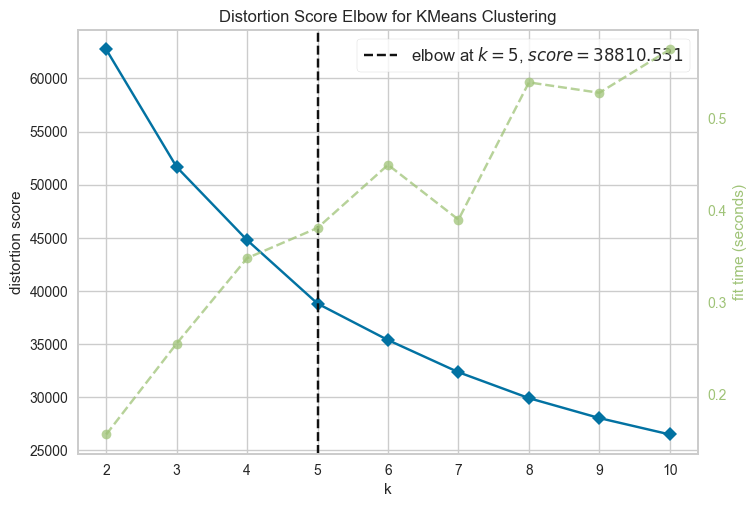

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_minmax)
Elbow_M.show()

In [94]:
features = df_minmax.copy()
kmeans_model = KMeans(n_clusters=5)
clust_labels = kmeans_model.fit_predict(features)
# features['Clusters'] = clust_labels

# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
# ax.set_xlabel('Age')
# ax.set_ylabel('Nationality')
# plt.colorbar(scatter)

silhouette_score(features, kmeans_model.labels_)

0.2842470598763764

In [95]:
pca = PCA(n_components=3)
pca.fit(df_minmax)
reduced_df_minmax = pd.DataFrame(pca.transform(df_minmax), columns=(["c1","c2", "c3"]))

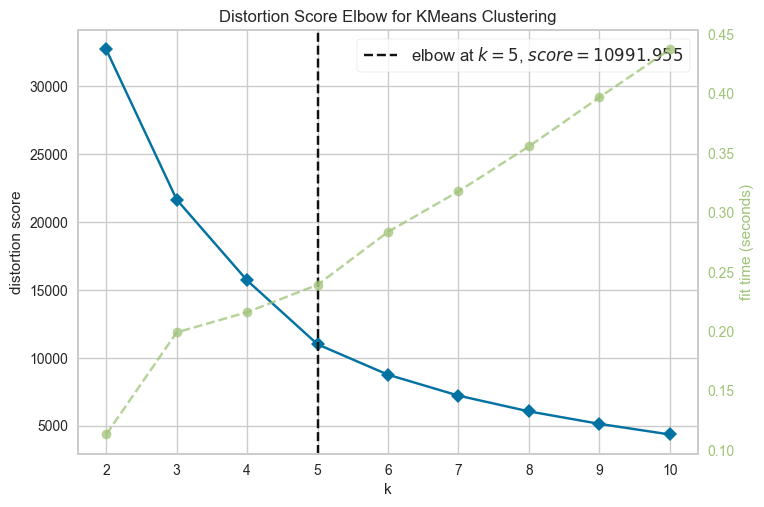

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_df_minmax)
Elbow_M.show()

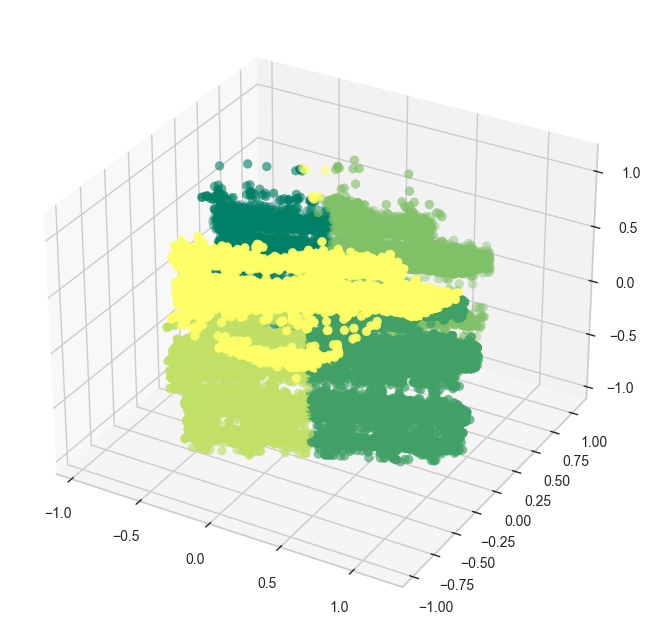

In [97]:
features = reduced_df_minmax.copy()
kmeans_model = KMeans(n_clusters=5)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(features['c1'], features['c2'], features['c3'], s=40, c=features["Clusters"], marker='o', cmap='summer')
plt.show()

In [98]:
silhouette_score(features, kmeans_model.labels_)

0.7178013173058182

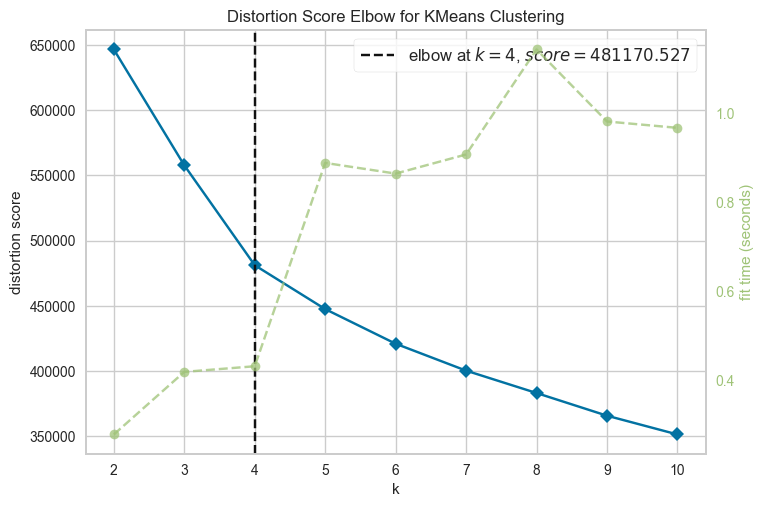

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_robust)
Elbow_M.show()

In [99]:
features = df_robust.copy()
kmeans_model = KMeans(n_clusters=4)
clust_labels = kmeans_model.fit_predict(features)
# features['Clusters'] = clust_labels

# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
# ax.set_xlabel('Age')
# ax.set_ylabel('Nationality')
# plt.colorbar(scatter)

silhouette_score(features, kmeans_model.labels_)

0.22781390938316737

In [100]:
pca = PCA(n_components=3)
pca.fit(df_robust)
reduced_df_robust = pd.DataFrame(pca.transform(df_robust), columns=(["c1","c2", "c3"]))

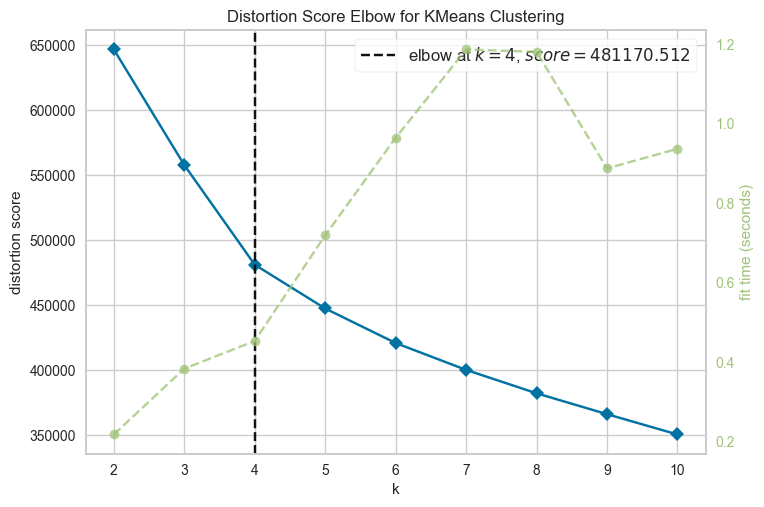

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [101]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_robust)
Elbow_M.show()

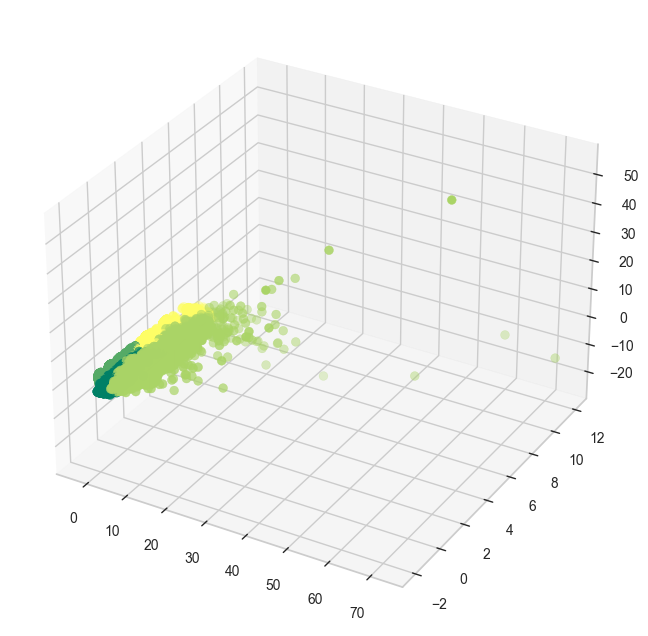

In [104]:
features = reduced_df_robust.copy()
kmeans_model = KMeans(n_clusters=4)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(features['c1'], features['c2'], features['c3'], s=40, c=features["Clusters"], marker='o', cmap='summer')
plt.show()

In [105]:
silhouette_score(features, kmeans_model.labels_)

0.5227151149496225

### Feature Selection

In [112]:
df['SRHighFloor'].value_counts()

0    79582
1     3968
Name: SRHighFloor, dtype: int64

In [113]:
df['SRAccessibleRoom'].value_counts()

0    83529
1       21
Name: SRAccessibleRoom, dtype: int64

In [114]:
df['SRMediumFloor'].value_counts()

0    83477
1       73
Name: SRMediumFloor, dtype: int64

In [115]:
df['SRLowFloor'].value_counts()

0    83432
1      118
Name: SRLowFloor, dtype: int64

In [116]:
df['SRBathtub'].value_counts()

0    83312
1      238
Name: SRBathtub, dtype: int64

In [117]:
df['SRShower'].value_counts()

0    83407
1      143
Name: SRShower, dtype: int64

In [118]:
df['SRCrib'].value_counts()

0    82445
1     1105
Name: SRCrib, dtype: int64

In [119]:
df['SRKingSizeBed'].value_counts()

0    54077
1    29473
Name: SRKingSizeBed, dtype: int64

In [120]:
df['SRTwinBed'].value_counts()

0    71640
1    11910
Name: SRTwinBed, dtype: int64

In [121]:
df['SRNearElevator'].value_counts()

0    83522
1       28
Name: SRNearElevator, dtype: int64

In [122]:
df['SRAwayFromElevator'].value_counts()

0    83257
1      293
Name: SRAwayFromElevator, dtype: int64

In [123]:
df['SRNoAlcoholInMiniBar'].value_counts()

0    83540
1       10
Name: SRNoAlcoholInMiniBar, dtype: int64

In [124]:
df['SRQuietRoom'].value_counts()

0    76165
1     7385
Name: SRQuietRoom, dtype: int64

In [125]:
df.shape

(83550, 28)

In [127]:
selected_features=df.drop(columns=['SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower', 'SRLowFloor','SRNearElevator','SRAwayFromElevator','SRNoAlcoholInMiniBar', 'SRCrib'])

In [128]:
selected_features.shape

(83550, 19)

### BIRCH 

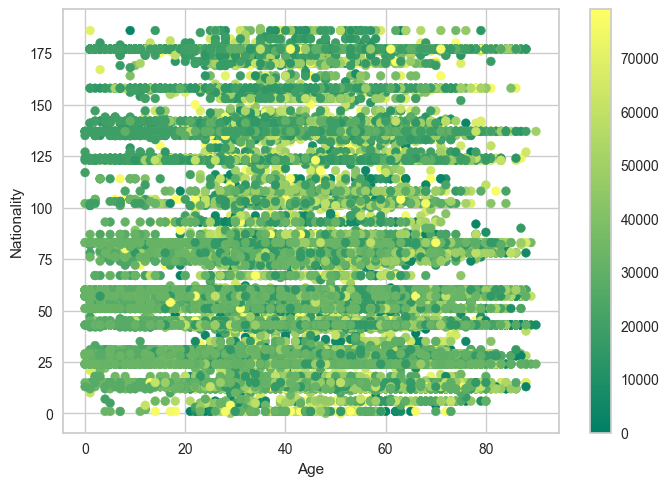

In [129]:
from sklearn.cluster import Birch

features = selected_features.copy()
brc = Birch(n_clusters=None)
clust_labels = brc.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
ax.set_xlabel('Age')
ax.set_ylabel('Nationality')
plt.colorbar(scatter)




In [131]:
silhouette_score(features, brc.labels_)

0.07478614786084932

In [132]:
pca = PCA(n_components=3)
pca.fit(selected_features)
reduced_selected_features = pd.DataFrame(pca.transform(selected_features), columns=(["c1","c2", "c3"]))

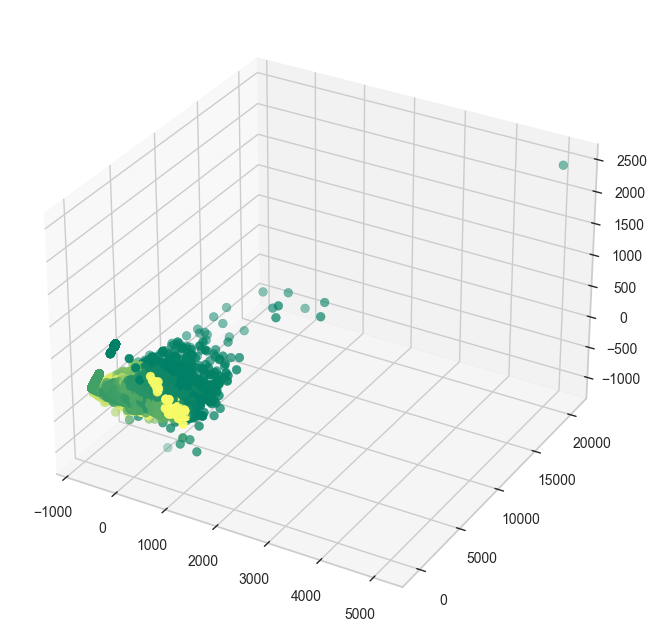

In [134]:
features = reduced_selected_features.copy()
brc = Birch(n_clusters=None)
clust_labels = brc.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(features['c1'], features['c2'], features['c3'], s=40, c=features["Clusters"], marker='o', cmap='summer')
plt.show()

In [135]:
silhouette_score(features, brc.labels_)

0.2887032261494147

### Data subset

In [136]:
df['Nationality'].value_counts()

57     12417
137    11589
43     10225
60      8653
51      4900
       ...  
66         1
64         1
159        1
151        1
125        1
Name: Nationality, Length: 187, dtype: int64

In [149]:
top_10 = df['Nationality'].value_counts().head(10)
top_10

57     12417
137    11589
43     10225
60      8653
51      4900
177     3426
83      3364
15      3118
24      2901
123     2724
Name: Nationality, dtype: int64

In [150]:
top_10_df = df.loc[df['Nationality'].isin(top_10.index)]
top_10_df

Nationality        Age  DaysSinceCreation  AverageLeadTime  \
0              137  51.000000                150               45   
1              137  45.398028               1095               61   
2               43  31.000000               1095                0   
3               57  60.000000               1095               93   
4               57  51.000000               1095                0   
...            ...        ...                ...              ...   
83581           43  48.000000                  0                0   
83582           57  49.000000                  0               91   
83583          137  49.000000                  0                0   
83584           83  52.000000                  0              116   
83585           83  54.000000                  0                0   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
0               371.0         105.3                 1                 0   
1               280.0          53.0                 0                 0   
2                 0.0           0.0                 0                 0   
3               240.0          60.0                 0                 0   
4                 0.0           0.0                 0                 0   
...               ...           ...               ...               ...   
83581             0.0           0.0                 0                 0   
83582           143.0           2.0                 0                 0   
83583             0.0           0.0                 0                 0   
83584           336.9         105.5                 0                 0   
83585             0.0           0.0                 0                 0   

       BookingsCheckedIn  PersonsNights  ...  SRMediumFloor  SRBathtub  \
0                      3              8  ...              0          0   
1                      1             10  ...              0          0   
2                      0              0  ...              0          0   
3                      1             10  ...              0          0   
4                      0              0  ...              0          0   
...                  ...            ...  ...            ...        ...   
83581                  0              0  ...              0          0   
83582                  1              2  ...              0          0   
83583                  0              0  ...              0          0   
83584                  1              8  ...              0          0   
83585                  0              0  ...              0          0   

       SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
0             0       0              0          0               0   
1             0       0              0          0               0   
2             0       0              0          0               0   
3             0       0              0          0               0   
4             0       0              0          0               0   
...         ...     ...            ...        ...             ...   
83581         0       0              0          0               0   
83582         0       0              1          0               0   
83583         0       0              1          0               0   
83584         0       0              0          0               0   
83585         0       0              0          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0                       0                     0            0  
1                       0                     0            0  
2                       0                     0            0  
3                       0                     0            0  
4                       0                     0            0  
...                   ...                   ...          ...  
83581                   0                     0            0  
83582                   0                     0        

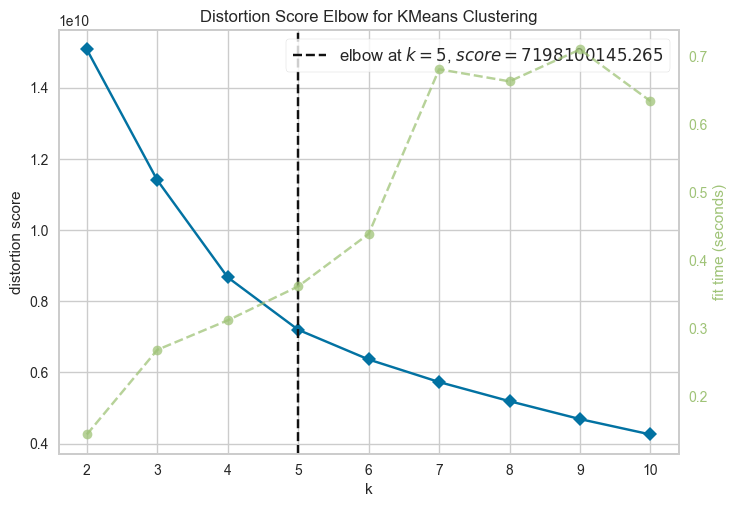

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [152]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(top_10_df)
Elbow_M.show()

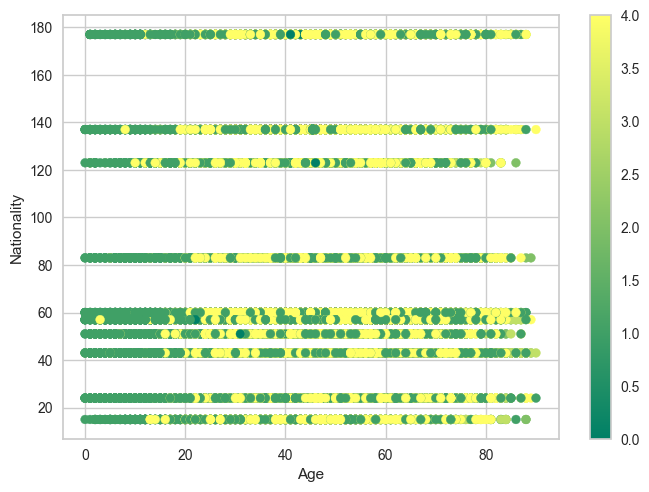

In [153]:
from sklearn.cluster import AgglomerativeClustering

features = top_10_df.copy()
ac = AgglomerativeClustering(n_clusters=5)
clust_labels = ac.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
ax.set_xlabel('Age')
ax.set_ylabel('Nationality')
plt.colorbar(scatter)



In [154]:
silhouette_score(features, ac.labels_)

0.38716279047012253

#### Scalers

In [155]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

df_standard = standard.fit_transform(top_10_df)
df_minmax = minmax.fit_transform(top_10_df)
df_robust = robust.fit_transform(top_10_df)

Minmax Scaler

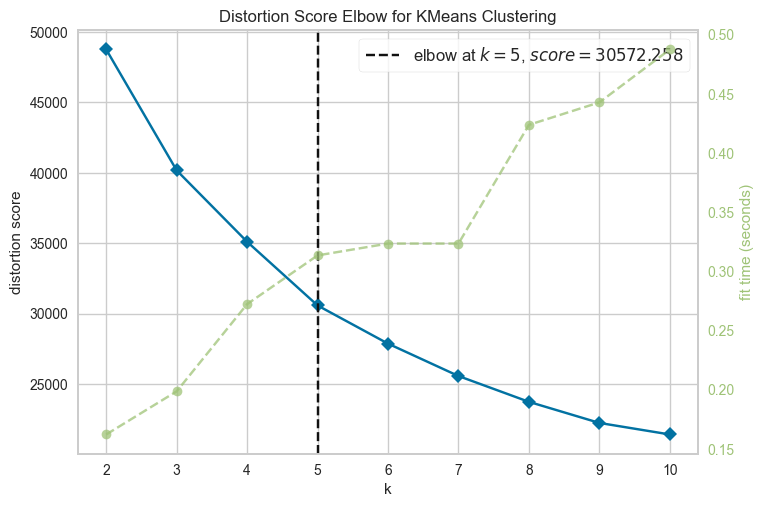

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [156]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_minmax)
Elbow_M.show()

In [161]:
from sklearn.cluster import AgglomerativeClustering

features = df_minmax.copy()
ac = AgglomerativeClustering(n_clusters=5)
clust_labels = ac.fit_predict(features)
# features['Clusters'] = clust_labels

# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
# ax.set_xlabel('Age')
# ax.set_ylabel('Nationality')
# plt.colorbar(scatter)

silhouette_score(features, clust_labels)

0.21168697077245863

Standard Scaler

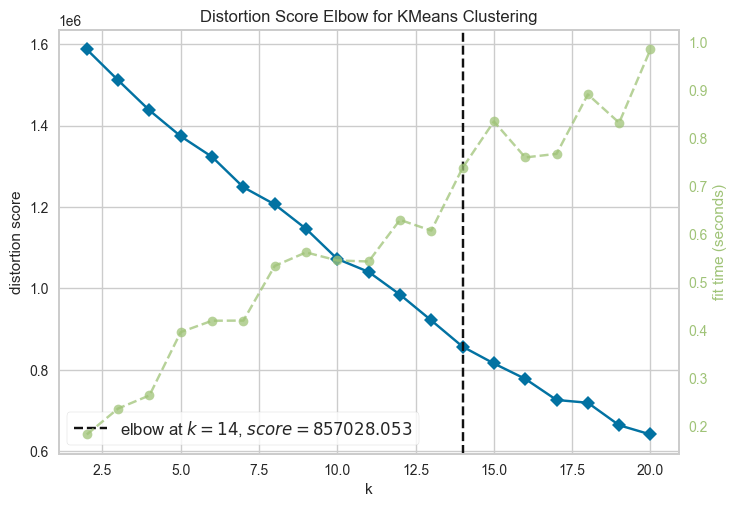

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [160]:
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(df_standard)
Elbow_M.show()

In [ ]:
features = df_standard.copy()
ac = AgglomerativeClustering(n_clusters=14)
clust_labels = ac.fit_predict(features)
# features['Clusters'] = clust_labels

# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
# ax.set_xlabel('Age')
# ax.set_ylabel('Nationality')
# plt.colorbar(scatter)

silhouette_score(features, clust_labels)

Robust Scaler

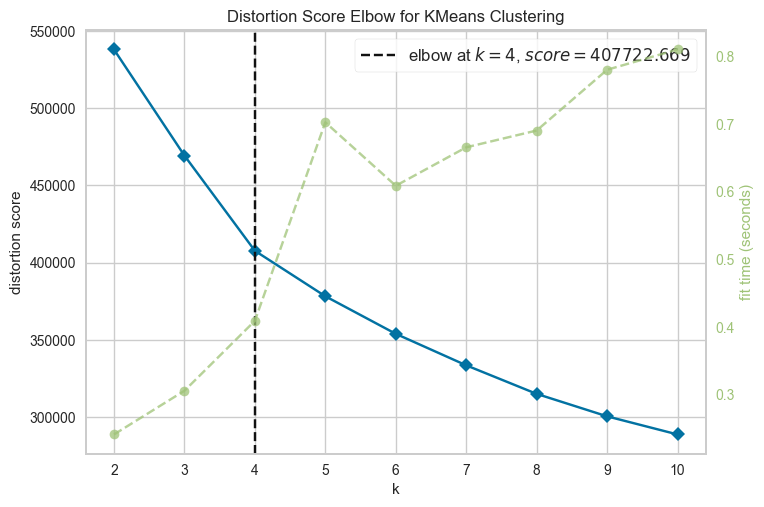

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [159]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_robust)
Elbow_M.show()

In [ ]:
features = df_robust.copy()
ac = AgglomerativeClustering(n_clusters=4)
clust_labels = ac.fit_predict(features)
# features['Clusters'] = clust_labels

# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
# ax.set_xlabel('Age')
# ax.set_ylabel('Nationality')
# plt.colorbar(scatter)

silhouette_score(features, clust_labels)